PROJECT TITLE: MACHINE LEARNING WITH PYTHON

GOAL: PREDICTING THE PRICES OF USED CARS

METRICS: Root_mean_squared_error

First, we are going to build a baseline model, then, the model will later on be improved on.

In [1]:
#import libraries for the project

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression

In [2]:
#Print out libraries versions for the benefit of others

print("Pandas version is:", pd.__version__)
print("Numpy version is:", np.__version__)
print("Sci-kit learn version is:", sklearn.__version__)

Pandas version is: 2.2.2
Numpy version is: 1.26.4
Sci-kit learn version is: 1.5.1


Load data into a DataFrame

In [3]:
df = pd.read_csv(r'C:\Users\USER\Desktop\Kaggle Hackathon\train.csv')

df.head()

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,0,MINI,Cooper S Base,2007,213000,Gasoline,172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,A/T,Yellow,Gray,None reported,Yes,4200
1,1,Lincoln,LS V8,2002,143250,Gasoline,252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel,A/T,Silver,Beige,At least 1 accident or damage reported,Yes,4999
2,2,Chevrolet,Silverado 2500 LT,2002,136731,E85 Flex Fuel,320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...,A/T,Blue,Gray,None reported,Yes,13900
3,3,Genesis,G90 5.0 Ultimate,2017,19500,Gasoline,420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,None reported,Yes,45000
4,4,Mercedes-Benz,Metris Base,2021,7388,Gasoline,208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,7-Speed A/T,Black,Beige,None reported,Yes,97500


Data exploration and Transformation

In [4]:
print(df.shape)
df.info()

(188533, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188533 entries, 0 to 188532
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            188533 non-null  int64 
 1   brand         188533 non-null  object
 2   model         188533 non-null  object
 3   model_year    188533 non-null  int64 
 4   milage        188533 non-null  int64 
 5   fuel_type     183450 non-null  object
 6   engine        188533 non-null  object
 7   transmission  188533 non-null  object
 8   ext_col       188533 non-null  object
 9   int_col       188533 non-null  object
 10  accident      186081 non-null  object
 11  clean_title   167114 non-null  object
 12  price         188533 non-null  int64 
dtypes: int64(4), object(9)
memory usage: 18.7+ MB


In [5]:
#checking for null values
df.isnull().sum()

id                  0
brand               0
model               0
model_year          0
milage              0
fuel_type        5083
engine              0
transmission        0
ext_col             0
int_col             0
accident         2452
clean_title     21419
price               0
dtype: int64

In [6]:
#Proportion of null values
(df.isnull().sum() / len(df)) * 100

id               0.000000
brand            0.000000
model            0.000000
model_year       0.000000
milage           0.000000
fuel_type        2.696080
engine           0.000000
transmission     0.000000
ext_col          0.000000
int_col          0.000000
accident         1.300568
clean_title     11.360876
price            0.000000
dtype: float64

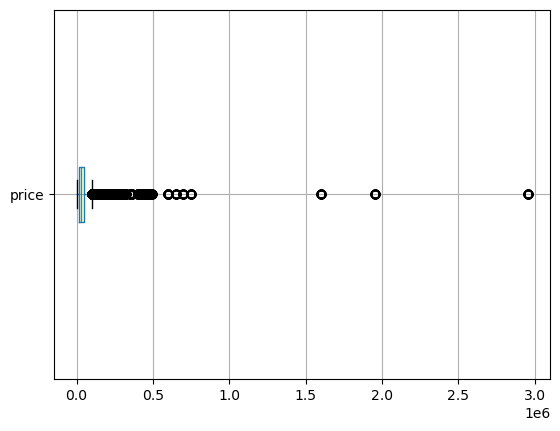

In [7]:
df.boxplot(column='price', vert=False)
plt.show();

In [8]:
df.price.describe() / 100

count     1885.330000
mean       438.780162
std        788.195223
min         20.000000
25%        170.000000
50%        308.250000
75%        499.000000
max      29540.830000
Name: price, dtype: float64

Apparently, from the above exploration, some outliers could harm our model, hence the need to take care of them. 

In [9]:
q1, q9 = df['price'].quantile([0.1, 0.9])

In [10]:
df = df[df['price'].between(q1, q9)]
df.price.describe() / 100

count    1510.670000
mean      338.275217
std       171.066922
min        99.000000
25%       195.000000
50%       307.750000
75%       449.990000
max       785.000000
Name: price, dtype: float64

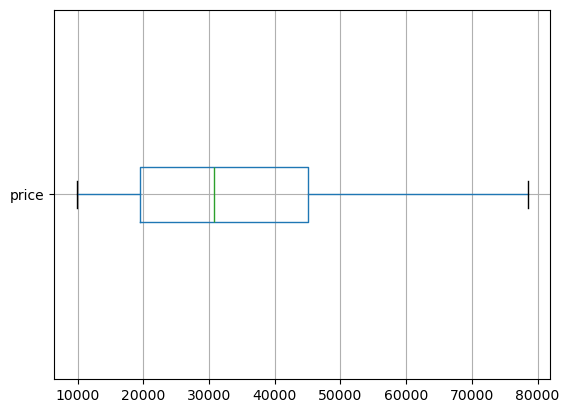

In [11]:
df.boxplot(column='price', vert=False)
plt.show();

In [12]:
#Data splitting into feature matrix and target vector

target = 'price'
X = df.drop(columns=[target])
y = df[target]

In [13]:
#Clasify dataTypes of features

cat_features = X.select_dtypes('object').columns.to_list()
num_features = X.select_dtypes('number').columns.to_list()

Train/Test split: Our data will be split into a train and validation set.

In [14]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

print(len(X_train))
print(len(X_val))
print(len(y_train))
print(len(y_val))

120853
30214
120853
30214


In [15]:
#Build a preprocessing pipeline

num_processing = Pipeline(
    [
        ('scaler', StandardScaler())
    ]
)

cat_processing = Pipeline(
    [
        ('imputer', SimpleImputer(strategy= 'most_frequent')),
        ('encoder', OneHotEncoder(handle_unknown='ignore'))
    ]
)

In [16]:
transform = ColumnTransformer(
    transformers= [
        ('num', num_processing, num_features),
        ('cat', cat_processing, cat_features)
    ]
)

Build a linearregression model

In [17]:
model = Pipeline(
    [
        ('transform', transform),
        ('regression', LinearRegression())
    ]
)

In [18]:
model.fit(X_train, y_train)

Pipeline(steps=[('transform',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['id', 'model_year',
                                                   'milage']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['brand', 'model',
                                                   'fuel_type', 'engine',
                                                   'transmission', 'ext_col',
                                                   'int_col', 'accident',
                                                   'clean_title'])])),
                ('regression', LinearRegression())])

Evaluating the data

In [19]:
#make a prediction using the validation data
y_pred = model.predict(X_val)

#calculate the root mean squared error
rmse = np.sqrt(mean_squared_error(y_val, y_pred))
print("Validation RMSE is:", round(rmse, 2))

Validation RMSE is: 11689.28


Using Cross Validation to ensure robustness, we perform a 5-fold cross validation

In [20]:
scores = cross_val_score(model,  X, y, cv=5, scoring="neg_root_mean_squared_error")
print('CV RMSE:', scores)
print('Mean CV RMSE:', scores.mean())

CV RMSE: [-11690.4352141  -11669.48561798 -11695.32343625 -11698.90072549
 -11748.1396111 ]
Mean CV RMSE: -11700.45692098344


Prepare a submission

In [21]:
#Load the test data

test_df = pd.read_csv(r'C:\Users\USER\Desktop\Kaggle Hackathon\test.csv')
test_df.head()

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title
0,188533,Land,Rover LR2 Base,2015,98000,Gasoline,240.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,6-Speed A/T,White,Beige,None reported,Yes
1,188534,Land,Rover Defender SE,2020,9142,Hybrid,395.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,8-Speed A/T,Silver,Black,None reported,Yes
2,188535,Ford,Expedition Limited,2022,28121,Gasoline,3.5L V6 24V PDI DOHC Twin Turbo,10-Speed Automatic,White,Ebony,None reported,NaN
3,188536,Audi,A6 2.0T Sport,2016,61258,Gasoline,2.0 Liter TFSI,Automatic,Silician Yellow,Black,None reported,NaN
4,188537,Audi,A6 2.0T Premium Plus,2018,59000,Gasoline,252.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,A/T,Gray,Black,None reported,Yes


In [23]:
#make a prediction fhe test data

y_test_pred = model.predict(test_df).round(2)
y_test_pred[:5]

array([17477.37, 53877.  , 45920.95, 22544.6 , 29297.03])

In [28]:
submission = pd.DataFrame(
    {'id': test_df['id'], 'price': y_test_pred}
)
try:
    submission.to_csv(r'C:\Users\USER\Desktop\Kaggle Hackathon\submission.csv', index=False)
    print('File saved successfully!')
except Exception as e:
    print(f"Error saving file: {e}")

File saved successfully!


In [26]:
import os
os.getcwd()

'C:\\Users\\USER'

In [58]:
type(submission)
submission.head()

,id,price
0,188533,17477.37
1,188534,53877.00
2,188535,45920.95
3,188536,22544.60
4,188537,29297.03


In [57]:
submission.isnull().sum()

id       0
price    0
dtype: int64

In [29]:
len(submission)

125690